In [1]:
import ROOT
import ostap.fixes.fixes
from ostap.core.core import cpp, Ostap
from ostap.core.core import pwd, cwd, ROOTCWD
from ostap.core.core import rootID, funcID, funID, fID, histoID, hID, dsID
from ostap.core.core import VE
from ostap.histos.histos import h1_axis, h2_axes, h3_axes
from ostap.histos.graphs import makeGraph, hToGraph, hToGraph2, hToGraph3, lw_graph
import ostap.trees.trees
import ostap.trees.cuts
import ostap.histos.param
import ostap.histos.compare
import ostap.io.root_file
import ostap.math.models
import ostap.fitting.roofit 
import ostap.fitting.models as Models

Welcome to JupyROOT 6.20/06


In [6]:
canv = ROOT.TCanvas("canv","canv",900,450)
rfile = ROOT.TFile("new.root","READ")
ds = rfile["tree"]

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canv


In [63]:
from math import atan, sqrt
W1   = 0.004 # mm/ns
zCSC = 853.1 # mm
T23 = 4.97526
my_events = []
for ev in ds:
    lCSC  = sqrt( ev.xCSC**2 + ev.yCSC**2 )
    zTPC  = ev.peak1*W1
    Treco = ev.T/35310.
    if Treco >T23-0.05 and Treco<T23+0.05:
        evt = {"T":Treco, "l":lCSC, "z":zTPC, "Atr":ev.THETAe, "Ttr":ev.Tp, "Ztr":ev.zpos}
        my_events.append( evt )
print("EVENTS SELECTED: " + str(len(my_events)))

EVENTS SELECTED: 2920


In [40]:
len(ds)

7000

Warning in <TROOT::Append>: Replacing existing TH1: hZr (Potential memory leak).


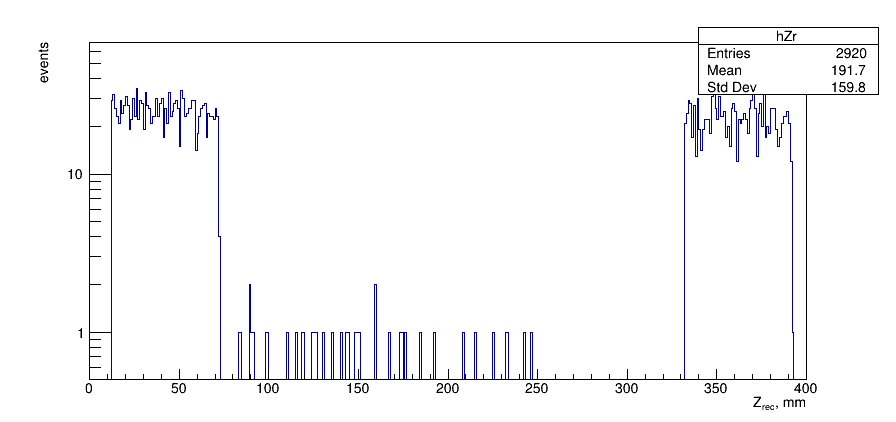

In [64]:
hZr = ROOT.TH1F("hZr",";Z_{rec}, mm; events",400,0,400)
for ev in my_events:
    hZr.Fill(ev["z"])
hZr.Draw()
canv.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: hAclose (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hAfar (Potential memory leak).


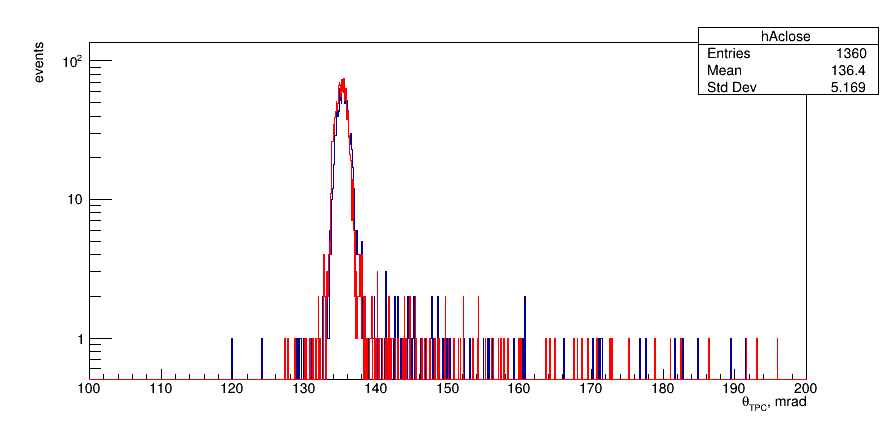

In [65]:
hAclose = ROOT.TH1F("hAclose",";#theta_{TPC}, mrad;events", 1000, 100, 200)
hAfar   = ROOT.TH1F("hAfar"  ,";#theta_{TPC}, mrad;events", 1000, 100, 200)
hAfar.SetLineColor(2)
for ev in my_events:
    if ev["z"]<80:
        hAfar  .Fill( atan( ev["l"] / (zCSC -ev["z"]))*1000.)
    if ev["z"]>330:
        hAclose.Fill( atan( ev["l"] / (zCSC - ev["z"]))*1000.)
hAclose.Draw()
hAfar.Draw("same")
ROOT.gPad.SetLogy()
canv.Draw()

In [66]:
print(hAclose.mean())
print(hAfar.mean())

( 136.36 +- 0.140831 )
( 136.175 +- 0.138887 )


In [67]:
print(hAclose.rms())
print(hAfar.rms())

( 5.16869 +- 0.502058 )
( 5.39161 +- 0.50294 )


In [68]:
for i in range(30):
    zz = 2.0+0.05*i
    hAfar.Reset()
    hAclose.Reset()
    for ev in my_events:
        if ev["z"]<80:
            hAfar  .Fill( atan( ev["l"] / (zCSC + zz - ev["z"]))*1000.)
        if ev["z"]>330:
            hAclose.Fill( atan( ev["l"] / (zCSC + zz - ev["z"]))*1000.)
    print("zz=" + str(zz)+"\t"+ str(hAclose.mean() - hAfar.mean()) )

zz=2.0	( 0.0163334 +- 0.2027 )
zz=2.05	( 0.0109723 +- 0.202685 )
zz=2.1	( 0.00561294 +- 0.202669 )
zz=2.15	( 0.000255295 +- 0.202653 )
zz=2.2	( -0.00510064 +- 0.202637 )
zz=2.25	( -0.0104549 +- 0.202622 )
zz=2.3	( -0.0158074 +- 0.202606 )
zz=2.35	( -0.0211582 +- 0.20259 )
zz=2.4	( -0.0265072 +- 0.202575 )
zz=2.45	( -0.0318546 +- 0.202559 )
zz=2.5	( -0.0372003 +- 0.202543 )
zz=2.55	( -0.0425442 +- 0.202527 )
zz=2.6	( -0.0478864 +- 0.202512 )
zz=2.65	( -0.053227 +- 0.202496 )
zz=2.7	( -0.0585658 +- 0.20248 )
zz=2.75	( -0.0639029 +- 0.202465 )
zz=2.8	( -0.0692383 +- 0.202449 )
zz=2.85	( -0.074572 +- 0.202433 )
zz=2.9	( -0.0799039 +- 0.202418 )
zz=2.95	( -0.0852342 +- 0.202402 )
zz=3.0	( -0.0905628 +- 0.202386 )
zz=3.05	( -0.0958896 +- 0.202371 )
zz=3.1	( -0.101215 +- 0.202355 )
zz=3.1500000000000004	( -0.106538 +- 0.202339 )
zz=3.2	( -0.11186 +- 0.202324 )
zz=3.25	( -0.11718 +- 0.202308 )
zz=3.3	( -0.122498 +- 0.202292 )
zz=3.35	( -0.127815 +- 0.202277 )
zz=3.4000000000000004	( -0.13313 +

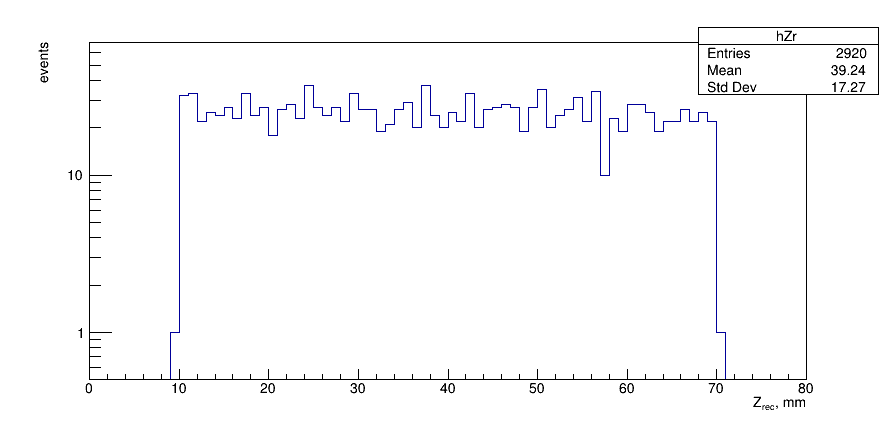

In [69]:
zCalibA = -2.18
hZr.Reset()
for ev in my_events:
    hZr.Fill(ev["z"]+zCalibA)
hZr.GetXaxis().SetRangeUser(0,80)
hZr.Draw()
canv.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: hDZtrue (Potential memory leak).


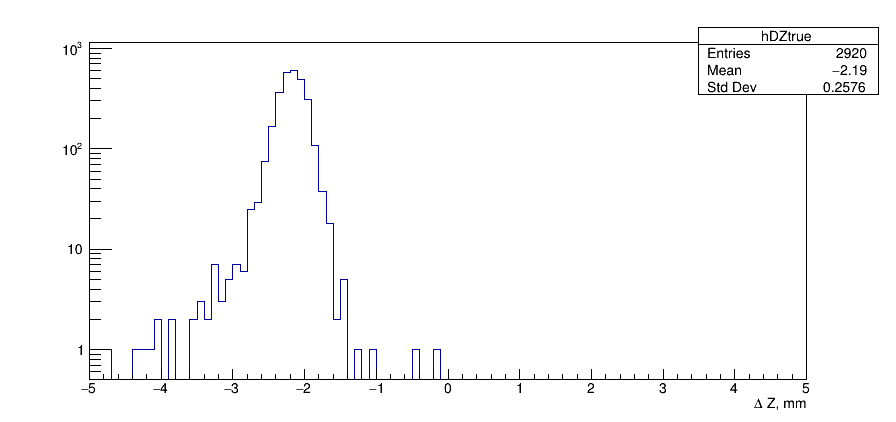

In [70]:
hDZtrue = ROOT.TH1F("hDZtrue",";#Delta Z, mm;",100,-5,5)
for ev in my_events:
    hDZtrue.Fill(ev["Ztr"] - ev["z"])
hDZtrue.Draw()
canv.Draw()

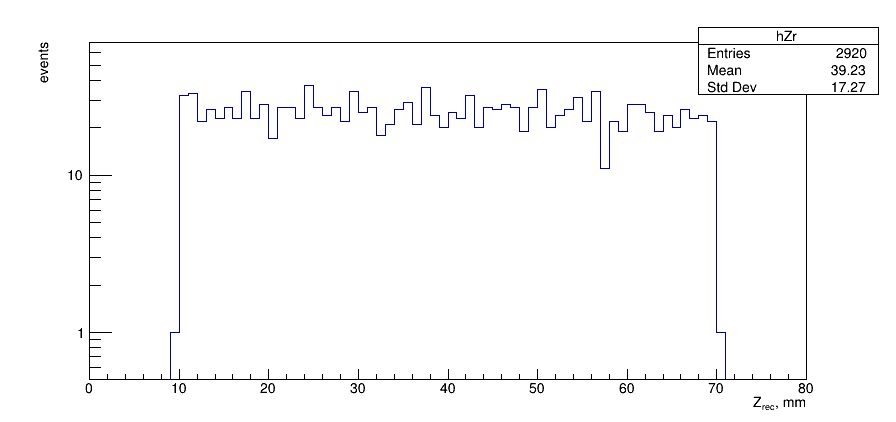

In [71]:
zCalib = -2.19
hZr.Reset()
for ev in my_events:
    hZr.Fill(ev["z"]+zCalib)
hZr.GetXaxis().SetRangeUser(0,80)
hZr.Draw()
canv.Draw()

In [72]:
Lclose_list = []
Lfar_list = []
for ev in my_events:
    if ev["z"]+zCalib>30 and ev["z"]+zCalib<50:
        Lfar_list.append(ev["l"])
    if ev["z"]+zCalib>350 and ev["z"]+zCalib<370:
        Lclose_list.append(ev["l"])
from statistics import mean, stdev, median
print("Median (far)  : " + str(median(Lfar_list)))
print("Median (close): " + str(median(Lclose_list)))
dL = median(Lfar_list) - median(Lclose_list)
print("Median angle  : " + str(1000.*atan(dL/320.)))

Median (far)  : 110.32339841646888
Median (close): 66.89180256490495
Median angle  : 134.89944265128977


In [61]:
Atr_list = []
for ev in my_events:
    Atr_list.append(1000.*ev["Atr"])
print("Median aTRUE: " + str(median(Atr_list)))

Median aTRUE: 134.91100072860718


In [73]:
Lclose_list = []
Lfar_list = []
for ev in my_events:
    if ev["z"]+zCalibA>30 and ev["z"]+zCalibA<50:
        Lfar_list.append(ev["l"])
    if ev["z"]+zCalibA>350 and ev["z"]+zCalibA<370:
        Lclose_list.append(ev["l"])
from statistics import mean, stdev, median
print("Median (far)  : " + str(median(Lfar_list)))
print("Median (close): " + str(median(Lclose_list)))
dL = median(Lfar_list) - median(Lclose_list)
print("Median angle  : " + str(1000.*atan(dL/320.)))

Median (far)  : 110.3239859483663
Median (close): 66.91255952354217
Median angle  : 134.83755273338375
